# Object detection

#### The next dataset will be used 

- PASCAL Visual Object Classes: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/
 
#### the next articles will be used:

- R-CNN: https://arxiv.org/abs/1311.2524
- Fast R-CNN: https://arxiv.org/abs/1504.08083
- Faster R-CNN: https://arxiv.org/abs/1506.01497


# How single-shot detector (SSD) works? (Image classification and object detection)

- 1. **Image classification:** in CV takes an image and predicts the object in an image.
- 2. **Object detection:** not only predicts the object but also finds their location in terms of bounding boxes.

<img src="./img/comp_vision/img_class_obj_detect.png" alt="nearby_objects" width="500"/>

# Single-Shot Detector (SSD)
SSD has two components: a backbone model and SSD head: 
-  **Backbone model:** usually is a pre-trained image classification network as a feature extractor. (Typically a network like ResNet trained on ImageNet)

- **SSD head:** is just one or more convolutional layers added to this backbone and the outputs are interpreted as the bounding boxes and classes of objects in the spatial location of the final layers activations.

Architecture of a convolutional neural network with a SSD detector:

<img src="./img/comp_vision/ssd.png" alt="nearby_objects" width="700"/>


### Grid cell

- Instead of using sliding window, SSD divides the image using a grid and have each grid cell be responsible for detecting objects in that region of the image.

- Detection objects simply means predicting the class and location of an object within that region.

- If no object is present, we consider it as the background class and the location is ignored. 

- For instance, we could use a 4x4 grid in the example below. Each grid cell is able to output the position and shape of the object it contains.

<img src="./img/comp_vision/grid_cell.png" alt="nearby_objects" width="700"/>

# Anchor box

Each grid cell in SSD can be assigned with multiple anchor/prior boxes. These anchor boxes are pre-defined and each one is responsible for a size and shape within a grid cell.

<img src="./img/comp_vision/anchor_box_pool.png" alt="nearby_objects" width="700"/>


### SSD + Anchor box

- **SSD:** uses a **matching phase while training**, to match the appropriate anchor box with the bounding boxes of each **ground truth object** within an image.

- **Anchor box:** with the highest degree of overlap with an object is responsible for predicting that object’s class and its location. This property is used for training the network and for predicting the detected objects and their locations once the network has been trained. In practice, each anchor box is specified by an aspect ratio and a zoom level.

### Aspect ratio

- Not all objects are square in shape. Some are longer and some are wider, by varying degrees. 

- SSD architecture allows pre-defined aspect ratios of the anchor boxes to account for this.

- The ratios parameter can be used to specify the different aspect ratios of the anchor boxes associates with each grid cell at each zoom/scale level.

<img src="./img/comp_vision/ratio.png" alt="nearby_objects" width="700"/>


### Zoom level

- It is not necessary for the anchor boxes to have the same size as the grid cell. We might be interested in finding smaller or larger objects within a grid cell.

-  Zooms parameter is used to specify how much the anchor boxes need to be scaled up or down with respect to each grid cell.

### Receptive Field

- Receptive field is defined as the **region in the input space that a particular CNN’s feature is looking at (i.e. be affected by).**

- The convolution operation, features at different layers represent different sizes of region in the input image. 

- Example start with the bottom layer (5x5) and then apply a convolution that results in the middle layer (3x3) where one feature (green pixel) represents a 3x3 region of the input layer (bottom layer)

- And then apply the convolution to middle layer and get the top layer (2x2) where each feature corresponds to a 7x7 region on the input image. 

- These kind of green and orange 2D array are also called feature maps which refer to a set of features created by applying the same feature extractor at different locations of the input map in a sliding window fastion.

- Features in the same feature map have the same receptive field and look for the same pattern but at different locations. This creates the spatial invariance of ConvNet.

Visualizing CNN feature maps and receptive field:


<img src="./img/comp_vision/ConvNet.png" alt="nearby_objects" width="700"/>

So, SSD allows us to define a hierarchy of grid cells at different layers. 
For example, we could use a **4x4 grid** to find smaller objects, a **2x2 grid** to find mid sized objects and a **1x1 grid** to find objects that cover the entire image.


# R-CNN (Regions with Convolutional Neural Networks) Earlier works

Architecture is a combination of multiple algorithms put together. Contains the next steps:

1. First uses a selection search algorithm to **select 2000 region proposals** that might contain objects. 

2. Each of these region proposals or Regions of Interest (RoIs) is processed through a convolutional net to obtain feature maps.

3. The feature maps are then passed to an SVM model to classify the object class and to a regression model to obtain tight bounding boxes

<img src="./img/comp_vision/obj_detection/R-CNN_image.png" alt="nearby_objects" width="700"/>


- Then a CNN is used to perform forward propagation on each region proposal to extract its features. Next, features of each region proposal are used for predicting the class and bounding box of this region proposal.

- 1. **Region Proposals:** R-CNN uses **selective search** to generate around 2000 region proposals (candidate object bounding boxes) from an input image. These proposals are meant to capture all the potential objects in the image.

- 1. 1 **Over-Segmentation:** Initially, the input image is over-segmented into **many small regions based on color, texture, and intensity similarities.**

- 1. 2 **Hierarchical Grouping:** These small regions are then **hierarchically merged** based on various features like **color, texture, size, and shape compatibility.** The idea is to **combine regions that likely belong to the same object.**


- 1. 3 **Region Proposals:** Through this process, **Selective Search proposes around 2000 candidate regions** (region proposals) in the image. These regions **vary in size and aspect ratio**, aiming to cover all potential objects.


**Example:**
Consider an image with a dog, a cat, and a ball. The Selective Search initially breaks down the image into small, seemingly random regions. It then starts merging these regions based on similarities - like merging parts of the dog together, then parts of the cat, and finally the ball. As the merging progresses, it proposes various region combinations, resulting in around 2000 proposals that might contain these objects, ensuring that the regions encompassing the dog, the cat, and the ball are included among these proposals.
This process allows R-CNN to focus its object detection efforts on these proposed regions rather than processing the entire image, making it more efficient than examining every possible region.



- 2. **Feature Extraction with CNN:** Each proposed region is **independently processed by a Convolutional Neural Network (CNN)** to extract features. Since these regions vary in size, they are warped or cropped to fit the input size required by the CNN.

- 3. **Object Classification:** The extracted features for each region proposal are then fed into a set of class-specific linear Support Vector Machines (SVMs) to classify whether each region contains an object of interest (and what type).

- 4. **Bounding Box Regression:** In parallel to classification, a regression model is trained to adjust the bounding boxes of the region proposals to better fit the objects.

- 5. **Separate Models for Different Tasks:** R-CNN involves separate models and stages for different tasks: a 
**CNN** for feature extraction, **SVMs** for object classification, and a regression model for bounding box refinement.

- 6. **Training in Stages:** The training process in R-CNN is multi-staged and complex. 
Firstly, the **CNN is pre-trained** on a large image classification dataset (like ImageNet) and then **fine-tuned** for the **object detection** task on the specific dataset. SVMs and the bounding box regressor are trained separately.

- 7.  **High Accuracy with High Computational Cost:** R-CNN significantly improved the accuracy of object detection compared to previous methods. However, its major drawback is computational inefficiency. Processing each region proposal independently with a CNN makes it quite slow, particularly for real-time applications.

- 8. **Limited Scalability:** Due to its computational intensity and complexity, R-CNN is less scalable for large-scale applications or when dealing with a large number of object classes.


In summary, R-CNN was an important step forward in object detection for its ability to integrate deep learning with traditional computer vision techniques. However, its high computational cost and complex training process led to the development of more efficient successors like Fast R-CNN and Faster R-CNN.

<img src="./img/comp_vision/region_cnn.png" alt="nearby_objects" width="700"/>

# R-CNN and selective search algorithm 

The selective search algorithm works by generating sub-segmentations of the image that could belong to one object — based on color, texture, size and shape — and iteratively combining similar regions to form objects. This gives ‘object proposals’ of different scales.

<img src="./img/comp_vision/obj_detection/selective_search_region_proposals.png" alt="nearby_objects" width="700"/>

<img src="./img/comp_vision/obj_detection/selective_search algorithm_2.png" alt="nearby_objects" width="700"/>

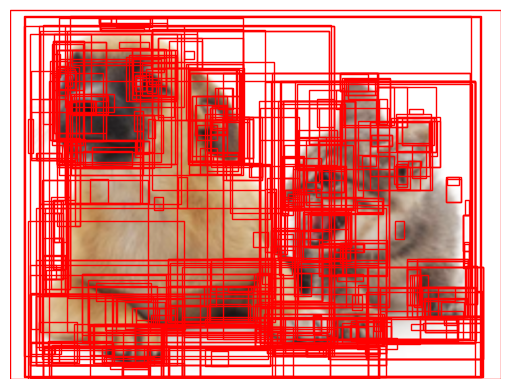

array([[ 77, 208,  12,  56],
       [154, 494,  39,  14],
       [275, 407,  57,  24],
       ...,
       [ 99, 100, 545, 410],
       [ 24,  23, 621, 465],
       [294,  88, 351, 372]], dtype=int32)

In [8]:
import cv2
import matplotlib.pyplot as plt

# Selective_search function uses OpenCV's implementation to get real object candidates. 
def selective_search(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Convert the image from BGR to RGB (as OpenCV loads in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a selective search segmentation object
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(image_rgb)
    ss.switchToSelectiveSearchFast()  # or use ss.switchToSelectiveSearchQuality() for better results but slower

    # Run selective search
    rects = ss.process()

    # Visualize the results
    visualize_candidates(image_rgb, rects)

    return rects

def visualize_candidates(image, candidates, num_show=500):
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Draw rectangles around the first 'num_show' candidates
    for x, y, w, h in candidates[:num_show]:
        rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Example usage
selective_search("./img/comp_vision/dog_cat.png")


# R-CNN and Feature extraction from Region Proposals

At the end of this stage in the pipeline, the authors generate a 4096 dimensional feature vector from each of the 2000 region proposals.

- **Supervised Pre-training:** The CNN described by Krizhevsky et al [3], now popularly known as the “AlexNet”

- **Domain-Specific Fine-Tuning:** Now, the network needs to be fine-tuned to learn a) The visual features of the new types of images- distorted region proposals

- **Classifcation:** The final 1000 way classification layer of the CNN from pre-training is replaced with a randomly initialized (N+1) way softmax classification layer

<img src="./img/comp_vision/obj_detection/rcnn_step1.png" alt="nearby_objects" width="900"/>


# R-CNN Stage 2: SVM for object classification

Learning an individual linear SVM (Support Vector Machine) classifier for each class, that detects the presence or absence of an object belonging to a particular class.

- **Inputs:** The 4096-d feature vector for each region proposal.

- **Labels for training:** The features of all region proposals that have an IoU overlap of less than 0.3 with the ground truth bounding box are considered negatives for that class during training. All other proposals (IoU overlap greater than 0.3, but not a **ground truth** bounding box) are ignored for the purpose of training the SVM.

- **Test time inference for a single image:** The class-specific dot products between the features and SVM weights are consolidated into a single matrix-matrix product for an image. That is, for every image, a 2000 x 4096 feature matrix is generated (the 4096-d feature from the CNN for all 2000 region proposals). The SVM weight matrix is 4096 x N where N is the number of classes.


<img src="./img/comp_vision/obj_detection/rcnn_svm.png" alt="nearby_objects" width="600"/>









In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import cv2
import numpy as np
import logging
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from torch.utils.data import Subset

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


def load_dataset():
    """
    Load and preprocess a subset of the Fashion-MNIST dataset.
    Returns DataLoader objects for the subsets of training (100 instances) 
    and testing datasets (10 instances).
    """
    transform = transforms.Compose([transforms.ToTensor()])

    # Load the full Fashion-MNIST datasets
    full_trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    full_testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

    # Define indices for the subsets
    train_indices = np.arange(1000) 
    test_indices = np.arange(100)  

    # Create subset datasets
    trainset = Subset(full_trainset, train_indices)
    testset = Subset(full_testset, test_indices)

    # Create data loaders
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

    return trainloader, testloader


# Define the R-CNN Model
class FashionRCNN(nn.Module):
    def __init__(self):
        """
        Initialize the FashionRCNN model.
        The model consists of a simple CNN for feature extraction.
        """
        super(FashionRCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        """
        Forward pass of the model.
        Applies the feature extraction layers.
        """
        x = self.features(x)
        return x.view(x.size(0), -1)  # Flatten the output

    def extract_features(self, x):
        """
        Extract features from the input batch.
        This function is used for feature extraction for SVM training.
        """
        with torch.no_grad():
            x = self.features(x)
        return x.view(x.size(0), -1).cpu().numpy()

# Main function to execute the training and testing
def main():
    trainloader, testloader = load_dataset()
    net = FashionRCNN()

    # Extracting features from training data
    logger.info('Starting feature extraction for training data')
    features = []
    labels = []
    for i, data in enumerate(trainloader, 0):
        inputs, label = data
        feature = net.extract_features(inputs)
        features.extend(feature)
        labels.extend(label.numpy())

    # SVM classifier training
    logger.info('Starting SVM training not linear classificator')
    svm_classifier = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
    svm_classifier.fit(features, labels)
    logger.info('SVM training completed')

    # Testing with SVM classifier
    logger.info('Starting SVM testing')
    correct = 0
    total = 0
    for data in testloader:
        images, label = data
        feature = net.extract_features(images)
        predicted = svm_classifier.predict(feature)
        total += label.size(0)
        correct += (predicted == label.numpy()).sum().item()

    logger.info(f'Accuracy of the SVM classifier on the 100 test images: {100 * correct / total}%')

if __name__ == "__main__":
    main()


INFO:__main__:Starting feature extraction for training data
INFO:__main__:Starting SVM training not linear classificator
INFO:__main__:SVM training completed
INFO:__main__:Starting SVM testing
INFO:__main__:Accuracy of the SVM classifier on the 100 test images: 79.0%


# Fast R-CNN

Fast R-CNN came in as an improvement over R-CNN. In this model, instead of feeding each of the 2000 regions to separate CNNs, the **whole image** is fed to a single CNN.r 

This results in a combined feature map for all the regions of interest. 

This is then passed on to fully connected layers having two branches - a softmax classifier to give probabilities for each class and a bounding box regressor for precise bounding box coordinates



- 2. **Region of Interest (RoI) Pooling Layer**: Unlike its predecessor (R-CNN), Fast R-CNN uses a single convolutional neural network to extract **feature maps from the entire image**. Then, it applies an RoI pooling layer to these feature maps to identify the regions of interest. This approach is more efficient as it avoids the need to run a CNN multiple times on thousands of region proposals.

- 3. **Integration of Object Detection Steps:** Fast R-CNN **integrates multiple steps such as region proposal, feature extraction, bounding box regression, and classification into a single model.** This integration significantly speeds up the detection process compared to traditional methods where these steps are performed separately.

- 4. **Multi-task Loss:** The model uses a multi-task loss function to train the network for both classification and bounding box regression simultaneously. This approach helps in optimizing both tasks together, improving overall accuracy.

- 5. **Shared Convolutional Layers:** By sharing convolutional layers across different tasks (region proposal and object detection), Fast R-CNN reduces computational redundancy. This shared architecture is more efficient compared to having separate networks for each task.

- 6. **Use of Selective Search for Region Proposals:** Initially, Fast R-CNN still relies on a method like Selective Search to generate region proposals, which are then processed by the network. However, it's faster than R-CNN as it doesn't need to process each region proposal independently.

- 7. **End-to-End Training:** The model can be trained end-to-end with backpropagation and stochastic gradient descent. This training method is simpler and more efficient compared to the complex multi-stage training process used in the original R-CNN.

Fast R-CNN improves the speed and efficiency of object detection while maintaining high accuracy, making it a significant advancement over the original R-CNN model.

<img src="./img/comp_vision/obj_detection/fast_cnn.png" alt="nearby_objects" width="700"/>

<img src="./img/comp_vision/obj_detection/fast_R_CNN.png" alt="nearby_objects" width="700"/>



# Region Proposal Network (RPN)
Region Proposal Network like other region proposal algorithms inputs an image and **returns regions of interest** that contain objects.

An RPN also returns an objectness score that measures how likely the region is to have an object vs. a background

Using a sliding window approach, a small network is overlaid onto the feature map.

At each spatial window, there are multiple anchor boxes that are of predetermined scales and aspect ratios.

model to detect objects of a wide range of scales and aspect ratios in the same image. Usually, three different scales and three different aspect ratios are used resulting in nine anchor boxes at each spatial location that denotes the maximum region proposals at that spatial location.

**The small network then feeds into fully connected layers with two heads - one for the objectness score and the other for the bounding box coordinates of the region proposals.**

**The RPN classifies the regions in a class agnostic manner as it is tasked with only finding the regions which contain the objects.**

<img src="./img/comp_vision/obj_detection/rpn.png" alt="nearby_objects" width="500"/>

# Faster R-CNN: 

Faster R-CNN improved the object detection architecture by **replacing the selection search algorithm** in Fast R-CNN with a convolutional network called the **Region Proposal Network (RPN)**

<img src="./img/comp_vision/obj_detection/faster_rcnn_arch.png" alt="nearby_objects" width="400"/>

The rest of the model architecture remains the same as Fast R-CNN

The image is fed to a CNN to produce a feature map from which features for regions proposed by the RPN are selected and resized by a pooling layer and fed to an FC layer with two heads, a **softmax classifier**, and a **bounding box regressor.**

- 1. **Faster R-CNN:** This is where the concept of **anchor boxes was first introduced**. Faster R-CNN uses a Region Proposal Network (RPN) that slides over the feature map produced by the backbone CNN. At each position of the sliding window, the RPN predicts multiple region proposals at different scales and aspect ratios. These proposals are parameterized as offsets from anchor boxes.


- 1. 1 **Anchor boxes, Predefined Boxes:** Anchor boxes are predefined fixed-sized boxes that serve as references at different positions across the image. They come in various scales and aspect ratios to match the typical shapes and sizes of the objects expected in the dataset.

- 1. 2 **Grid Overlay:** The image is divided into a grid (e.g., a 13x13 grid in YOLO). Each cell in this grid is responsible for predicting objects whose center falls within that cell.

- 1. 3 **Prediction Adjustment:** For each cell in the grid, the model predicts multiple bounding boxes and confidence scores. These **predictions are made relative to the anchor boxes.** Essentially, the model learns to adjust the size and position of these anchor boxes to fit the actual objects in the image.

**Example:**
Imagine looking at a garden scene through a grid of square windows. For each window square, you're not just looking for one type of object (like a flower or a butterfly) but **considering multiple possibilities (big flower, small flower, butterfly, etc.) at once. Each possibility is like an anchor box.** You make a guess for each type in each square: "Is there a big flower here? How about a small one? Or a butterfly?" You **do this simultaneously** for each type in each square. Then, based on what you see through the grid, you adjust your guesses to fit what's actually there in the garden.


Each anchor box is compared with the ground truth during the training phase of the Faster R-CNN model, but the comparison isn't a direct matching with a ground truth mask. Rather, it's a process of evaluating and adjusting each anchor box based on how well it aligns with any real object (as per the ground truth data) in the image. 



# Mask R-CNN

Mask R-CNN is modified based on the faster R-CNN. Specifically, the mask R-CNN replaces the region of interest pooling layer with the region of interest (RoI) alignment layer.



<img src="./img/comp_vision/mask_R-CNN.png" alt="nearby_objects" width="700"/>

# RetinaNet

RetinaNet is one of the best one-stage object detection. Become a popular object detection model to be used with aerial and satellite imagery.

### Feature Pyramid Network
-  This means one would take an image and subsample it into lower resolution and smaller size images (thus, forming a pyramid). 
-  Hand-engineered features are then extracted from each layer in the pyramid to detect the objects
- In a CNN architecture, the output size of feature maps decreases after each successive block of convolutional operations, and forms a pyramidal structure.

<img src="./img/comp_vision/obj_detection/retina_piramid.png" alt="nearby_objects" width="500"/>

- (a) Featurized image pyramid, as we have discussed, is compute intensive.
- (b) Single (scale) feature maps have been used for faster detections.
- (c) Pyramidal feature hierarchy has been utilized by models such as Single Shot detector


### RetinaNet architecture
- (a) Bottom-up Pathway - The backbone network (e.g. ResNet) which calculates the feature maps at different scales, irrespective of the input image size or the backbone.

- (b) Top-down pathway and Lateral connections - The top down pathway upsamples the spatially coarser feature maps from higher pyramid levels, and the lateral connections merge the top-down layers and the bottom-up layers with the same spatial size.